# Calculating the most popular technical indicators

In [1]:
import pandas as pd
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = yf.download("IBM",
                 start="2020-01-01",
                 end="2020-12-31",
                 progress=False,
                 auto_adjust=True)

<Axes: title={'center': '20-day Sumple Moving Average (SMA)'}, xlabel='Date'>

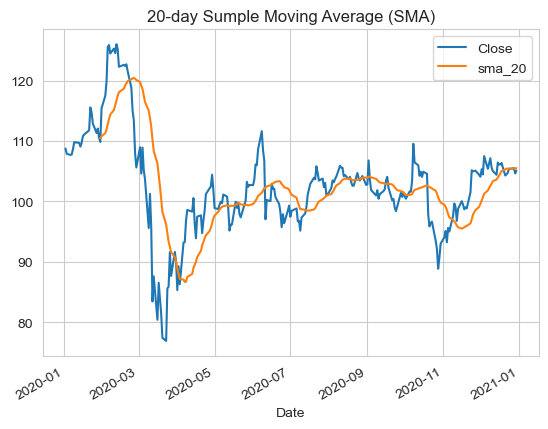

In [3]:
# Simple Moving Average
df['sma_20'] = talib.SMA(df['Close'], timeperiod=20)
(
    df[['Close', 'sma_20']]
    .plot(title='20-day Sumple Moving Average (SMA)')
)

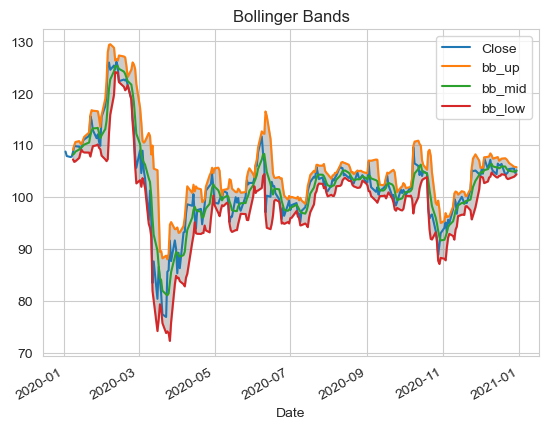

In [4]:
# plot the bollinvers bands
df['bb_up'], df['bb_mid'], df['bb_low'] = talib.BBANDS(df['Close'])

fig, ax = plt.subplots()

(
    df.loc[:, ['Close', 'bb_up', 'bb_mid', 'bb_low']]
    .plot(ax=ax, title='Bollinger Bands')
)

ax.fill_between(df.index, df['bb_up'], df['bb_low'], 
                color='grey', alpha=.4)

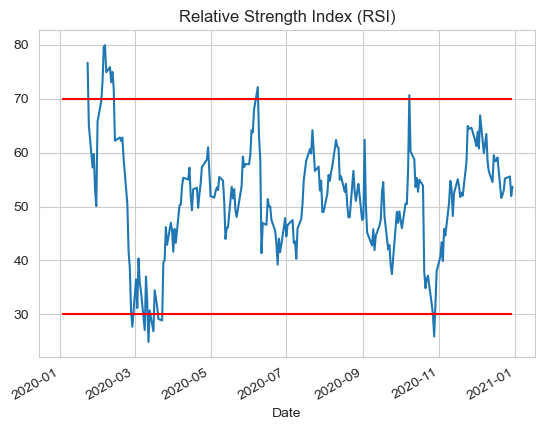

In [5]:
df['rsi'] = talib.RSI(df['Close'])
fig, ax = plt.subplots()
df['rsi'].plot(ax=ax,
               title='Relative Strength Index (RSI)')

ax.hlines(y=30,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color='red')

ax.hlines(y=70,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color='red')
plt.show()

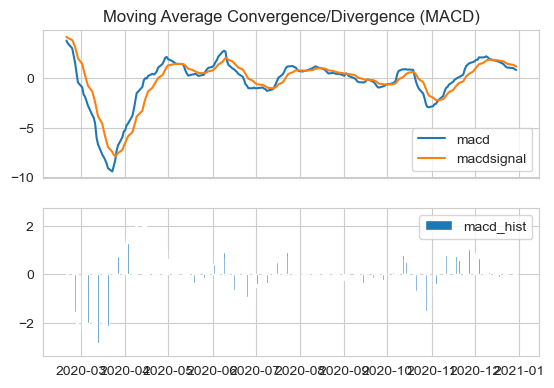

In [6]:
# MACD
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'],
                                                          fastperiod=12,
                                                          slowperiod=26,
                                                          signalperiod=9)
fig, ax = plt.subplots(2, 1, sharex=True)
(
    df[['macd', 'macdsignal']]
    .plot(ax=ax[0],
          title='Moving Average Convergence/Divergence (MACD)')
)
ax[1].bar(df.index, df['macdhist'].values, label='macd_hist')
ax[1].legend() 

In [7]:
from ta import add_all_ta_features

In [8]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

In [9]:
df = add_all_ta_features(df, open='Open', high='High', low='Low', close='Close', volume='Volume')

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


In [10]:
df

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,108.412362,109.151177,108.227664,108.749649,3293436,4.295746e+05,3293436,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.170792,NaN,0.000000
2020-01-03,107.263989,108.299935,107.255959,107.882347,2482890,9.261648e+05,810546,NaN,NaN,-38.324556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.797522,-0.800719,-0.797522
2020-01-06,107.143532,107.802034,106.966858,107.689613,2537073,2.780222e+06,-1726527,NaN,NaN,-12.953602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.178652,-0.178812,-0.974749
2020-01-07,107.360350,108.380229,107.127466,107.761871,3232977,2.821634e+06,1506450,NaN,NaN,14.314140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067098,0.067076,-0.908304
2020-01-08,108.018859,109.102985,107.545054,108.661301,4545916,4.789952e+06,6052366,NaN,NaN,19.540361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.834645,0.831181,-0.081240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,104.699620,105.823699,104.581297,104.716522,2817819,-2.888477e+07,13538582,-0.106192,-675492.605822,43.226447,...,1.073519,1.451643,-0.378124,-5.395448,-2.946212,-2.449236,104.131480,0.234604,0.234329,-3.708634
2020-12-24,105.646223,105.730741,104.978540,105.384216,1842111,-2.873991e+07,15380693,-0.145071,-403284.143399,6.212534,...,1.013988,1.364112,-0.350124,-10.299777,-4.416925,-5.882852,104.140356,0.637621,0.635596,-3.094661
2020-12-28,105.730741,106.998491,105.189833,105.494095,3781499,-3.124912e+07,19162192,-0.159313,-286314.181588,35.370646,...,0.964084,1.284106,-0.320022,-10.982977,-5.730136,-5.252841,104.155992,0.104265,0.104210,-2.993623


# Downloading the technical indicators

In [11]:
from alpha_vantage.techindicators import TechIndicators
ALPHA_VANTAGE_API_KEY = "ERX2YB042VPAOW35"

In [12]:
ta_api = TechIndicators(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')

In [13]:
rsi_df, rsi_meta = ta_api.get_rsi(symbol='IBM', time_period=14)

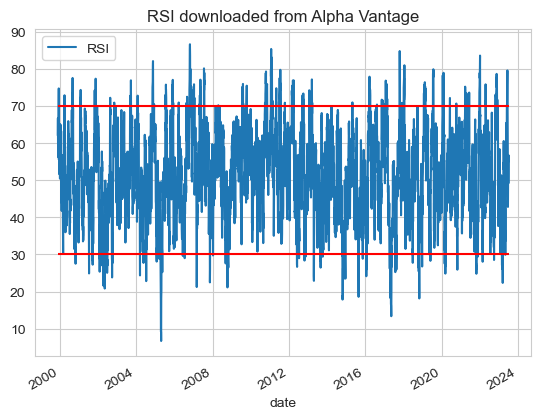

In [14]:
fig, ax = plt.subplots()
rsi_df.plot(ax=ax, title='RSI downloaded from Alpha Vantage')

ax.hlines(y=30,
          xmin=rsi_df.index.min(),
          xmax=rsi_df.index.max(),
          color='red')
ax.hlines(y=70,
          xmin=rsi_df.index.min(),
          xmax=rsi_df.index.max(),
          color='red')

In [15]:
rsi_meta

{'1: Symbol': 'IBM',
 '2: Indicator': 'Relative Strength Index (RSI)',
 '3: Last Refreshed': '2023-07-07',
 '4: Interval': 'daily',
 '5: Time Period': 14,
 '6: Series Type': 'close',
 '7: Time Zone': 'US/Eastern Time'}

## There's more

In [16]:
import intrinio_sdk as intrinio
import pandas as pd

In [17]:
intrinio.ApiClient().set_api_key("OjY5N2I1NjJmNGI3NGFlNzk2OTliMjFiMGQwZGM3NmNi")
security_api = intrinio.SecurityApi()

In [18]:
# r = security_api.get_security_price_technicals_macd(
#     identifier="IBM",
#     fast_period=12,
#     slow_period=26,
#     signal_period=9,
#     price_key="close",
#     start_date="2020-01-01",
#     end_date="2020-12-31",
#     page_size=500
# )

In [19]:
# macd_df = (
#     pd.DataFrame(r.technicals_dict)
#     .sort_values('date_time')
#     .set_index('date_time')
# )
# macd_df.index = pd.to_datetime(macd_df.index).date

In [20]:
# fig, ax = plt.subplots(2, 1, sharex=True)

# (
#     macd_df[['macd_line', 'signal_line']]
#     .plot(ax=ax[0],
#           title='MACD from Intrinio')
# )

# ax[1].bar(df.index, macd_df['macd_histogram'].values, label='macd_hist')
# ax[1].legend()

In [21]:
import pandas as pd
import yfinance as yf
import talib
import mplfinance as mpf

In [22]:
df = yf.download("BTC-USD",
                 period="9mo",
                 interval="1h",
                 progress=False)

In [23]:
df['3_line_strike'] = talib.CDL3LINESTRIKE(df['Open'], df['High'], df['Low'], df['Close'])

In [24]:
df[df['3_line_strike'] == -100].head()

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2022-11-04 10:00:00+00:00,20577.988281,20623.609375,20561.404297,20623.609375,20623.609375,198004736,-100
2022-11-07 15:00:00+00:00,20668.363281,20776.542969,20668.363281,20774.429688,20774.429688,1869037568,-100
2022-11-24 22:00:00+00:00,16561.378906,16603.044922,16555.150391,16600.615234,16600.615234,0,-100
2022-12-24 07:00:00+00:00,16830.193359,16851.875000,16824.781250,16851.875000,16851.875000,61894656,-100
2022-12-29 22:00:00+00:00,16597.251953,16633.386719,16591.957031,16633.109375,16633.109375,0,-100


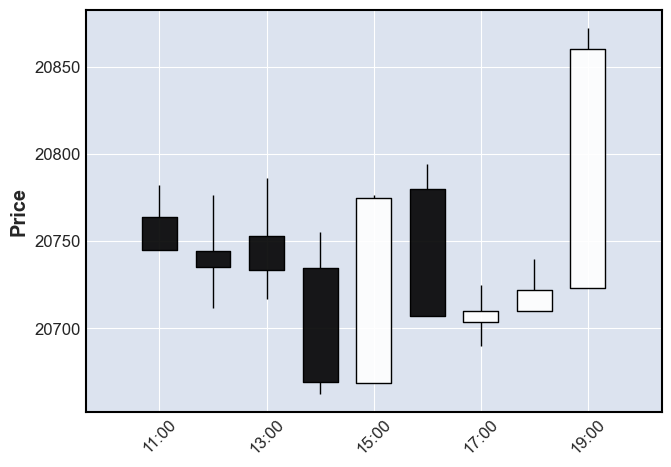

In [25]:
mpf.plot(df['2022-11-07 11:00:00':'2022-11-07 19:00:00'], type='candle')

In [26]:
df[df['3_line_strike'] == 100]

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2022-10-10 22:00:00+00:00,19240.255859,19243.257812,19102.978516,19136.289062,19136.289062,539576320,100
2022-12-31 17:00:00+00:00,16605.513672,16607.652344,16580.427734,16586.601562,16586.601562,0,100
2023-01-12 14:00:00+00:00,18277.402344,18317.617188,17995.203125,18011.955078,18011.955078,1592813568,100
2023-01-18 15:00:00+00:00,21425.060547,21515.003906,21028.021484,21049.835938,21049.835938,448841728,100
2023-01-21 20:00:00+00:00,23268.591797,23271.119141,23146.921875,23154.486328,23154.486328,0,100
2023-02-06 13:00:00+00:00,22894.949219,22921.816406,22840.326172,22841.501953,22841.501953,0,100
2023-03-27 05:00:00+00:00,27922.648438,27922.648438,27694.707031,27694.707031,27694.707031,168997888,100
2023-04-07 16:00:00+00:00,27963.013672,27966.634766,27881.507812,27896.037109,27896.037109,0,100
2023-06-12 12:00:00+00:00,25991.800781,25991.800781,25912.511719,25930.685547,25930.685547,41630720,100


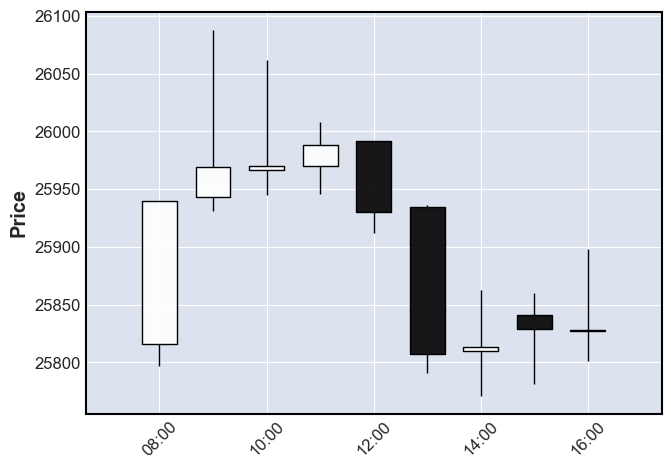

In [27]:
mpf.plot(df['2023-06-12 08:00:00':'2023-06-12 16:00:00'], type='candle')

# Building an interactive web app for technical analysis using Streamlit

In [28]:
import yfinance as yf
import streamlit as st
import datetime
import pandas as pd
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()

In [29]:
@st.cache   # 👈 This function will be cached
def get_sp500_component():
    df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    df = df[0]
    tickers = df['Symbol'].to_list()
    tickers_companies_dict = dict(
        zip(df['Symbol'], df['Security'])
    )
    return tickers, tickers_companies_dict

In [30]:
@st.cache
def load_data(symbol, start, end):
    return yf.download(symbol, start, end)

In [31]:
@st.cache
def convert_df_to_csv(df):
    return df.to_csv().encode('utf-8')